In [1]:
import datetime
import glob
import logging
import os
import shutil
import zipfile

import cdsapi
import xarray as xr
from xcube.core.store import new_data_store
from zappend.api import zappend
import zappend.levels

logging.basicConfig(level=logging.INFO)

Get land cover classification from CDS

In [2]:
time_ranges = [(year, year + 5) for year in range(1992, 2022, 5)]
time_ranges.append((2022, 2023))
time_ranges

[(1992, 1997),
 (1997, 2002),
 (2002, 2007),
 (2007, 2012),
 (2012, 2017),
 (2017, 2022),
 (2022, 2023)]

In [ ]:
for i, time_range in enumerate(time_ranges):
    print(time_range)
    dataset = "satellite-land-cover"
    request = {
        "variable": "all",
        "year": [str(year) for year in range(time_range[0], time_range[1])],
        'version': ['v2_0_7cds', 'v2_1_1']
    }
    client = cdsapi.Client(
        url="https://cds-beta.climate.copernicus.eu/api",
        key="917c02bf-1a72-468c-a3b3-482affbdfb87"
    )
    client.retrieve(dataset, request, f"temp{i}.zip")

Extract zip file and generate data cube

In [ ]:
for i in range(len(time_ranges)):
    with zipfile.ZipFile(f"temp{i}.zip", "r") as zip_ref:
        zip_ref.extractall("temp")

Convert from netcdf to zarr, which is needed for zappend

In [2]:
file_paths = glob.glob(f"temp/*.nc")
store_file = new_data_store("file", root="temp")
for file_path in file_paths:
    data_id = f"{file_path.split("/")[-1][:-3]}.zarr"
    print(data_id)
    ds = xr.open_mfdataset(file_path, engine="netcdf4")
    store_file.write_data(ds, data_id, replace=True)

ESACCI-LC-L4-LCCS-Map-300m-P1Y-2015-v2.0.7cds.zarr
C3S-LC-L4-LCCS-Map-300m-P1Y-2022-v2.1.1.zarr
ESACCI-LC-L4-LCCS-Map-300m-P1Y-1995-v2.0.7cds.zarr
ESACCI-LC-L4-LCCS-Map-300m-P1Y-2006-v2.0.7cds.zarr
ESACCI-LC-L4-LCCS-Map-300m-P1Y-2011-v2.0.7cds.zarr
ESACCI-LC-L4-LCCS-Map-300m-P1Y-2002-v2.0.7cds.zarr
ESACCI-LC-L4-LCCS-Map-300m-P1Y-1999-v2.0.7cds.zarr
C3S-LC-L4-LCCS-Map-300m-P1Y-2017-v2.1.1.zarr
ESACCI-LC-L4-LCCS-Map-300m-P1Y-2000-v2.0.7cds.zarr
ESACCI-LC-L4-LCCS-Map-300m-P1Y-1997-v2.0.7cds.zarr
ESACCI-LC-L4-LCCS-Map-300m-P1Y-2008-v2.0.7cds.zarr
C3S-LC-L4-LCCS-Map-300m-P1Y-2020-v2.1.1.zarr
ESACCI-LC-L4-LCCS-Map-300m-P1Y-1993-v2.0.7cds.zarr
ESACCI-LC-L4-LCCS-Map-300m-P1Y-2013-v2.0.7cds.zarr
ESACCI-LC-L4-LCCS-Map-300m-P1Y-2004-v2.0.7cds.zarr
C3S-LC-L4-LCCS-Map-300m-P1Y-2019-v2.1.1.zarr
ESACCI-LC-L4-LCCS-Map-300m-P1Y-2007-v2.0.7cds.zarr
ESACCI-LC-L4-LCCS-Map-300m-P1Y-1996-v2.0.7cds.zarr
ESACCI-LC-L4-LCCS-Map-300m-P1Y-2003-v2.0.7cds.zarr
ESACCI-LC-L4-LCCS-Map-300m-P1Y-1992-v2.0.7cds.zarr
ESAC

In [8]:
file_paths = sorted(glob.glob(f"temp/ESACCI*.zarr")) + sorted(glob.glob(f"temp/C3S*.zarr"))
file_paths

['temp/ESACCI-LC-L4-LCCS-Map-300m-P1Y-1992-v2.0.7cds.zarr',
 'temp/ESACCI-LC-L4-LCCS-Map-300m-P1Y-1993-v2.0.7cds.zarr',
 'temp/ESACCI-LC-L4-LCCS-Map-300m-P1Y-1994-v2.0.7cds.zarr',
 'temp/ESACCI-LC-L4-LCCS-Map-300m-P1Y-1995-v2.0.7cds.zarr',
 'temp/ESACCI-LC-L4-LCCS-Map-300m-P1Y-1996-v2.0.7cds.zarr',
 'temp/ESACCI-LC-L4-LCCS-Map-300m-P1Y-1997-v2.0.7cds.zarr',
 'temp/ESACCI-LC-L4-LCCS-Map-300m-P1Y-1998-v2.0.7cds.zarr',
 'temp/ESACCI-LC-L4-LCCS-Map-300m-P1Y-1999-v2.0.7cds.zarr',
 'temp/ESACCI-LC-L4-LCCS-Map-300m-P1Y-2000-v2.0.7cds.zarr',
 'temp/ESACCI-LC-L4-LCCS-Map-300m-P1Y-2001-v2.0.7cds.zarr',
 'temp/ESACCI-LC-L4-LCCS-Map-300m-P1Y-2002-v2.0.7cds.zarr',
 'temp/ESACCI-LC-L4-LCCS-Map-300m-P1Y-2003-v2.0.7cds.zarr',
 'temp/ESACCI-LC-L4-LCCS-Map-300m-P1Y-2004-v2.0.7cds.zarr',
 'temp/ESACCI-LC-L4-LCCS-Map-300m-P1Y-2005-v2.0.7cds.zarr',
 'temp/ESACCI-LC-L4-LCCS-Map-300m-P1Y-2006-v2.0.7cds.zarr',
 'temp/ESACCI-LC-L4-LCCS-Map-300m-P1Y-2007-v2.0.7cds.zarr',
 'temp/ESACCI-LC-L4-LCCS-Map-300m-P1Y-20

In [3]:
data_id_zarr = "cds_land_cover_classification.zarr"

Apply zappend and write one large data cube in zarr format

In [10]:
config = {
    "target_dir": f"s3://{os.environ['S3_USER_STORAGE_BUCKET']}/{data_id_zarr}",
    "target_storage_options": {
        "key": os.environ["S3_USER_STORAGE_KEY"],
        "secret": os.environ["S3_USER_STORAGE_SECRET"],
    },
    "force_new": True,
}
zappend(file_paths, config=config)

In [5]:
store_team = new_data_store(
    "s3",
    root=os.environ["S3_USER_STORAGE_BUCKET"],
    max_depth=4,
    storage_options=dict(
        anon=False,
        key=os.environ["S3_USER_STORAGE_KEY"],
        secret=os.environ["S3_USER_STORAGE_SECRET"],
    ),
)

In [6]:
ds = store_team.open_data(data_id_zarr)
ds

<xarray.Dataset> Size: 3TB
Dimensions:              (time: 31, lat: 64800, lon: 129600, bounds: 2)
Coordinates:
  * lat                  (lat) float64 518kB 90.0 90.0 89.99 ... -90.0 -90.0
  * lon                  (lon) float64 1MB -180.0 -180.0 -180.0 ... 180.0 180.0
  * time                 (time) datetime64[ns] 248B 1992-01-01 ... 2022-01-01
Dimensions without coordinates: bounds
Data variables:
    change_count         (time, lat, lon) uint8 260GB dask.array<chunksize=(1, 2025, 2025), meta=np.ndarray>
    crs                  int32 4B ...
    current_pixel_state  (time, lat, lon) float32 1TB dask.array<chunksize=(1, 2025, 2025), meta=np.ndarray>
    lat_bounds           (lat, bounds) float64 1MB dask.array<chunksize=(64800, 2), meta=np.ndarray>
    lccs_class           (time, lat, lon) uint8 260GB dask.array<chunksize=(1, 2025, 2025), meta=np.ndarray>
    lon_bounds           (lon, bounds) float64 2MB dask.array<chunksize=(129600, 2), meta=np.ndarray>
    observation_count    (time, lat, lon) uint16 521GB dask.array<chunksize=(1, 2025, 2025), meta=np.ndarray>
    processed_flag       (time, lat, lon) float32 1TB dask.array<chunksize=(1, 2025, 2025), meta=np.ndarray>
    time_bounds          (time, bounds) datetime64[ns] 496B dask.array<chunksize=(1, 2), meta=np.ndarray>
Attributes: (12/38)
    Conventions:                CF-1.6
    TileSize:                   2025:2025
    cdm_data_type:              grid
    comment:                    
    contact:                    https://www.ecmwf.int/en/about/contact-us/get...
    creation_date:              20181130T095451Z
    ...                         ...
    time_coverage_end:          19921231
    time_coverage_resolution:   P1Y
    time_coverage_start:        19920101
    title:                      Land Cover Map of ESA CCI brokered by CDS
    tracking_id:                61b96fd7-42c3-4374-9de1-0dc3b0bcae2a
    type:                       ESACCI-LC-L4-LCCS-Map-300m-P1Y

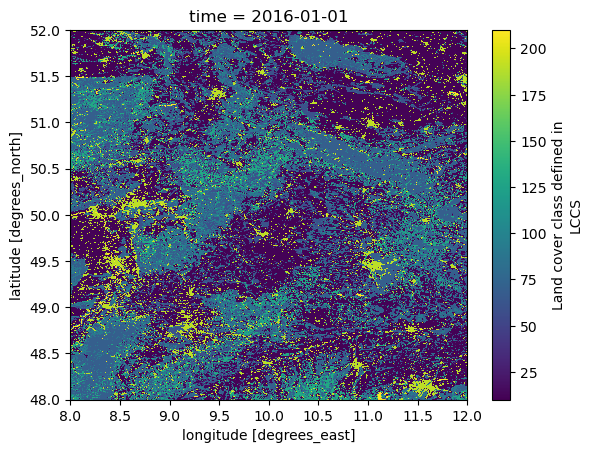

In [7]:
ds.lccs_class.sel(
    lat=slice(52, 48), 
    lon=slice(8, 12), 
    time= datetime.datetime(2016, 1, 1)
).plot()

Write to S3 team bucket with S3 data store

In [10]:
from zappend.levels import write_levels

write_levels(
    source_path=f"s3://{os.environ['S3_USER_STORAGE_BUCKET']}/cds_land_cover_classification.zarr",
    source_storage_options={
        "key": os.environ["S3_USER_STORAGE_KEY"],
        "secret": os.environ["S3_USER_STORAGE_SECRET"],
    },
    target_path=f"s3://{os.environ['S3_USER_STORAGE_BUCKET']}/cds_land_cover_classification.levels",
    force_new=True,
    logging=True,
    num_levels=6,
    excluded_variables=["time_bnds"]
)

2024-09-17 10:57:29,825 WARNING Setting 'force_new' is enabled. This will permanently delete existing targets (no rollback).
2024-09-17 10:57:29,950 INFO Processing in-memory slice dataset #0
INFO:zappend:Processing in-memory slice dataset #0
2024-09-17 10:57:30,018 INFO Creating target dataset s3://hub-deepesdl37/cds_land_cover_classification.levels/0.zarr
INFO:zappend:Creating target dataset s3://hub-deepesdl37/cds_land_cover_classification.levels/0.zarr
2024-09-17 11:03:07,109 INFO Transaction completed.
INFO:zappend:Transaction completed.
2024-09-17 11:03:07,110 INFO Slice dataset #0 processed
INFO:zappend:Slice dataset #0 processed
2024-09-17 11:03:07,111 INFO Slice s3://hub-deepesdl37/cds_land_cover_classification.levels/0.zarr written, 1/31 slices, 1/6 levels, 0.54% total
INFO:zappend:Slice s3://hub-deepesdl37/cds_land_cover_classification.levels/0.zarr written, 1/31 slices, 1/6 levels, 0.54% total
2024-09-17 11:03:07,565 WARNING Setting 'force_new' is enabled. This will permane

In [8]:
mlds = store_team.open_data("cds_land_cover_classification.levels")
mlds.num_levels

6

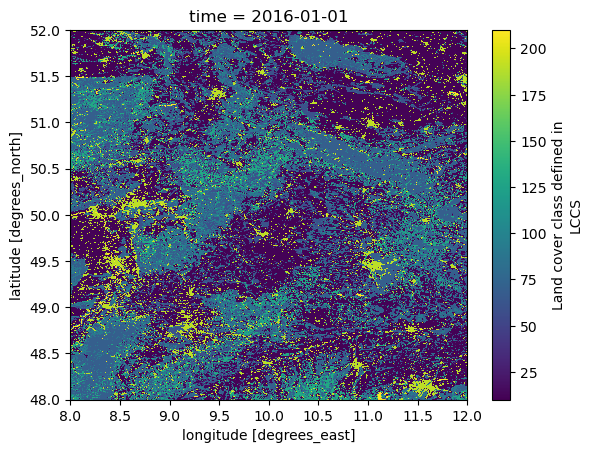

In [15]:
ds = mlds.get_dataset(0)
ds.lccs_class.sel(
    lat=slice(52, 48), 
    lon=slice(8, 12), 
    time= datetime.datetime(2016, 1, 1)
).plot()

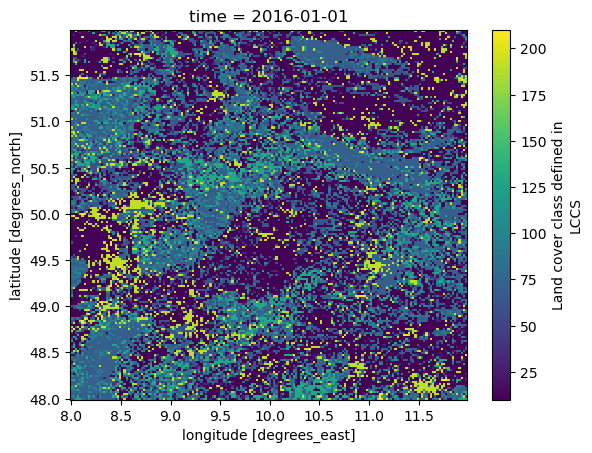

In [17]:
ds = mlds.get_dataset(3)
ds.lccs_class.sel(
    lat=slice(52, 48), 
    lon=slice(8, 12), 
    time= datetime.datetime(2016, 1, 1)
).plot()

Delete the temporary zip fil and extraction folder 

In [ ]:
zip_files = glob.glob("temp*.zip")
for zip_file in zip_files:
    os.remove(zip_file)
shutil.rmtree("temp")